In [1]:
using DifferentialEquations
using Plots
using Statistics
using DataFrames, GLM

In [2]:
dts = [0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625]

8-element Array{Float64,1}:
 0.5
 0.25
 0.125
 0.0625
 0.03125
 0.015625
 0.0078125
 0.00390625

## First we check Ito

In [4]:
u₀=1.
f(u,p,t) = - sin(u) * cos(u)^3
g(u,p,t) = cos(u)^2
f_analytic(u₀,p,t,W) = atan(W + tan(u₀))
ff = SDEFunction(f,g,analytic=f_analytic)
prob = SDEProblem(ff,g,u₀,(0.0,5.0))

SDEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 5.0)
u0: 1.0

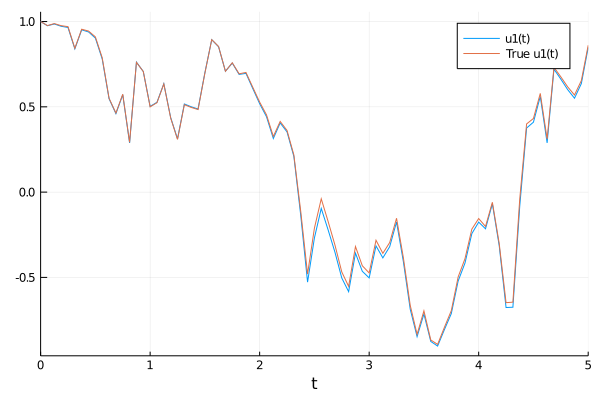

In [5]:
sol = solve(prob,RKMil(),dt=0.0625,adaptive=false)
plot(sol,plot_analytic=true)

In [6]:
result = []
for i in dts
    sol = solve(prob,RKMil(),dt=i,adaptive=false)
    m = mean((sol.u_analytic - sol.u).^2)
    append!(result, m)
end

log_dts = log.(dts)
log_result = log.(result) / 2

8-element Array{Float64,1}:
 -3.1299113115705315
 -1.8870249227591864
 -5.389534771554733
 -3.5642147214280806
 -5.699021007737085
 -5.014449221323827
 -4.5868035434645105
 -7.085064893591685

In [7]:
data = DataFrame(X=log_dts, Y=log_result)

,X,Y
,Float64,Float64
1,-0.693147,-3.12991
2,-1.38629,-1.88702
3,-2.07944,-5.38953
4,-2.77259,-3.56421
5,-3.46574,-5.69902
6,-4.15888,-5.01445
7,-4.85203,-4.5868
8,-5.54518,-7.08506


In [8]:
ols = lm(@formula(Y ~ X), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y ~ 1 + X

Coefficients:
───────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  -2.28408     0.908177  -2.52    0.0456  -4.50631    -0.0618529
X             0.724688    0.259463   2.79    0.0315   0.0898058   1.35957
───────────────────────────────────────────────────────────────────────────

## Now we check Stratonovich

In [9]:
# correction
f(u,p,t) = 0.

f (generic function with 1 method)

In [10]:
ff = SDEFunction(f,g,analytic=f_analytic)
prob = SDEProblem(ff,g,u₀,(0.0,5.0))

SDEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 5.0)
u0: 1.0

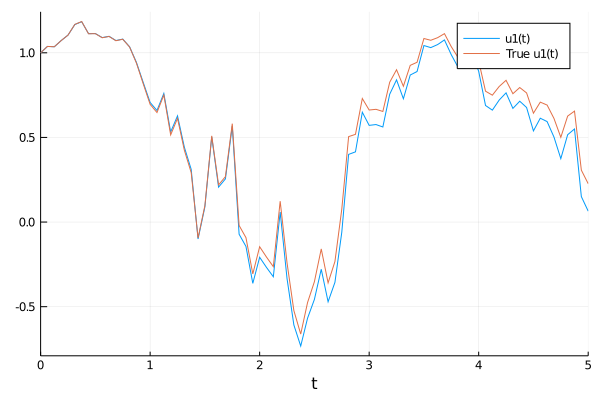

In [11]:
sol = solve(prob,RKMil(interpretation=:Stratonovich),dt=0.0625,adaptive=false)
plot(sol,plot_analytic=true)

In [12]:
result = []
for i in dts
    sol = solve(prob,RKMil(interpretation=:Stratonovich),dt=i,adaptive=false)
    m = mean((sol.u_analytic - sol.u).^2)
    append!(result, m)
end

log_dts = log.(dts)
log_result = log.(result) / 2

8-element Array{Float64,1}:
 -3.5857755108764353
 -2.4770420788340948
 -3.0799911499670425
 -3.7751362608028187
 -6.238661255889206
 -2.8720238130935307
 -6.698416071839221
 -5.759507394106774

In [13]:
data = DataFrame(X=log_dts, Y=log_result)

,X,Y
,Float64,Float64
1,-0.693147,-3.58578
2,-1.38629,-2.47704
3,-2.07944,-3.07999
4,-2.77259,-3.77514
5,-3.46574,-6.23866
6,-4.15888,-2.87202
7,-4.85203,-6.69842
8,-5.54518,-5.75951


In [14]:
ols = lm(@formula(Y ~ X), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y ~ 1 + X

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  -2.26639     1.03603   -2.19    0.0713  -4.80148      0.26869
X             0.655441    0.295991   2.21    0.0687  -0.0688231    1.3797
──────────────────────────────────────────────────────────────────────────